### Scaling scenario

In [ ]:
EXP_NAME_0 = 'main'
EXP_NAME_1 = 'parcrop'

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
ref_main = pd.read_csv(f'/root/torch-linear-assignment/experiments/res_scale_{EXP_NAME_0}.csv')
agg_by_nc_nr_ref = ref_main.groupby(['nc', 'nr']).agg({'time_mean': 'mean'}).reset_index()
ratios_ref = (agg_by_nc_nr_ref.nc / agg_by_nc_nr_ref.nr).values
sorted_index_ref = ratios_ref.argsort()

In [3]:
ref_main

,Unnamed: 0,nr,nc,factor,acc_mean,acc_std,time_mean,time_std
0,0,4,4,1.000000e+00,1.000,0.000,0.002819,8.243660e-03
1,1,4,4,1.000000e-01,1.000,0.000,0.000060,3.822438e-06
2,2,4,4,1.000000e-02,0.925,0.225,0.000058,9.833141e-07
3,3,4,4,1.000000e-03,1.000,0.000,0.000058,1.331734e-06
4,4,4,4,1.000000e-04,1.000,0.000,0.000058,1.181556e-06
...,...,...,...,...,...,...,...,...
203,203,128,128,1.000000e-08,1.000,0.000,0.000081,1.341091e-06
204,204,128,128,1.000000e-09,1.000,0.000,0.000081,2.653311e-06
205,205,128,128,1.000000e-10,1.000,0.000,0.000082,2.320880e-06
206,206,128,128,1.000000e+04,1.000,0.000,0.000081,2.029221e-06


In [4]:
resdf = pd.read_csv(f'/root/torch-linear-assignment/experiments/res_scale_{EXP_NAME_1}.csv')
agg_by_nc_nr = resdf.groupby(['nc', 'nr']).agg({'time_mean': 'mean'}).reset_index()
ratios = (agg_by_nc_nr.nc / agg_by_nc_nr.nr).values
sorted_index = ratios.argsort()

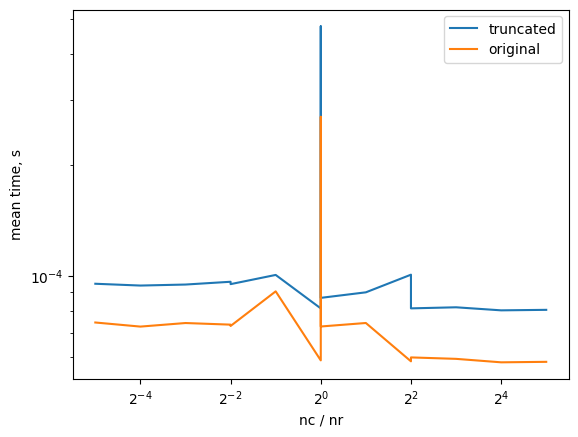

In [5]:
plt.plot(ratios[sorted_index], agg_by_nc_nr.time_mean.values[sorted_index], label='truncated')
plt.plot(ratios_ref[sorted_index], agg_by_nc_nr_ref.time_mean.values[sorted_index], label='original')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('nc / nr')
plt.ylabel('mean time, s')
plt.legend();

plt.savefig(f'/root/torch-linear-assignment/experiments/figures/scaling_time_{EXP_NAME_0}_{EXP_NAME_1}.jpg');

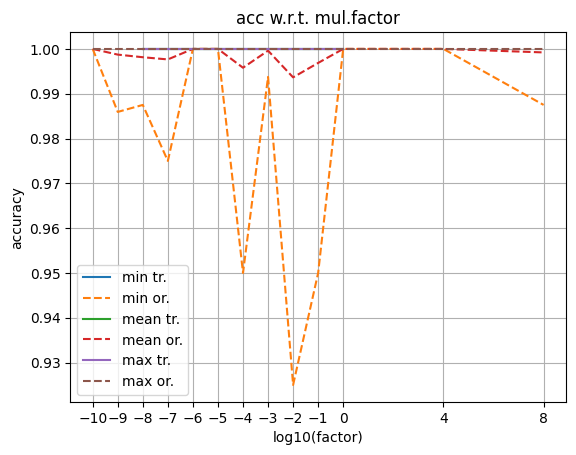

In [6]:
# sorted_index = resdf.factor.argsort()

agg = 'mean'
agg_by_factor = resdf.groupby('factor', sort=True).agg({'acc_mean': ['min', agg, 'max']}).reset_index()

agg_by_factor_ref = ref_main.groupby('factor', sort=True).agg({'acc_mean': ['min', agg, 'max']}).reset_index()


for t in ['min', agg, 'max']:

    plt.plot(
        np.log10(agg_by_factor.factor), agg_by_factor[('acc_mean', t)], label=t + ' tr.', ls='-'
    )
    plt.plot(
        np.log10(agg_by_factor_ref.factor), agg_by_factor_ref[('acc_mean', t)], label=t + ' or.', ls='--'
    )

# plt.xscale('log', base=10)
plt.xticks(np.log10(agg_by_factor_ref.factor.unique()));
plt.grid();
plt.legend();
plt.title('acc w.r.t. mul.factor');
plt.xlabel('log10(factor)');
plt.ylabel('accuracy');
plt.savefig(f'/root/torch-linear-assignment/experiments/figures/scaling_acc_{EXP_NAME_0}_{EXP_NAME_1}.jpg');

### shifting scanario

In [7]:
ref_shift = pd.read_csv(f'/root/torch-linear-assignment/experiments/res_shift_{EXP_NAME_0}.csv')
resdf_shift = pd.read_csv(f'/root/torch-linear-assignment/experiments/res_shift_{EXP_NAME_1}.csv')

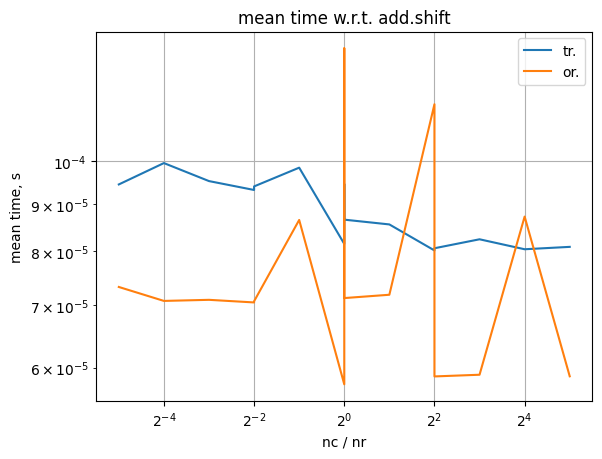

In [8]:
agg_by_nc_nr = resdf_shift.groupby(['nc', 'nr']).agg({'time_mean': 'mean'}).reset_index()
ratios = (agg_by_nc_nr.nc / agg_by_nc_nr.nr).values
sorted_index = ratios.argsort()
plt.plot(ratios[sorted_index], agg_by_nc_nr.time_mean.values[sorted_index], label='tr.')

agg_by_nc_nr_shift = ref_shift.groupby(['nc', 'nr']).agg({'time_mean': 'mean'}).reset_index()
ratios_shift = (agg_by_nc_nr_shift.nc / agg_by_nc_nr_shift.nr).values
sorted_index_shift = ratios_shift.argsort()
plt.plot(ratios_shift[sorted_index_shift], agg_by_nc_nr_shift.time_mean.values[sorted_index_shift], 
         label='or.')

plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('nc / nr')
plt.ylabel('mean time, s')
plt.legend()
plt.title('mean time w.r.t. add.shift');
plt.grid();

plt.savefig(f'/root/torch-linear-assignment/experiments/figures/scaling_time_{EXP_NAME_0}_{EXP_NAME_1}.jpg');


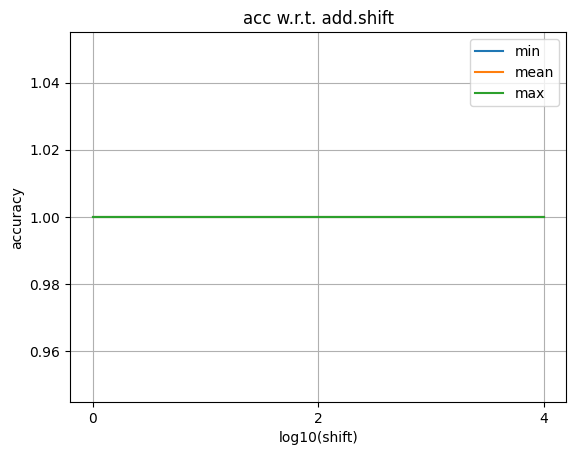

In [9]:
agg = 'mean'
agg_by_shift = resdf_shift.groupby('shift', sort=True).agg({'acc_mean': ['min', agg, 'max']}).reset_index()

for t in ['min', agg, 'max']:
    plt.plot(
        np.log10(agg_by_shift['shift']), agg_by_shift[('acc_mean', t)], label=t
    )

# plt.xscale('log', base=10)
plt.xticks(np.log10(agg_by_shift['shift'].unique()));
plt.grid();
plt.legend();
plt.title('acc w.r.t. add.shift');
plt.xlabel('log10(shift)');
plt.ylabel('accuracy');

plt.savefig(f'/root/torch-linear-assignment/experiments/figures/scaling_acc_{EXP_NAME_0}_{EXP_NAME_1}.jpg');